# Точки данных с противоречивыми признаками

In [1]:
import numpy as np
import pandas as pd

from utils import definitions as defs
from utils import visualization as viz

In [2]:
df = pd.read_excel(defs.ETLED_DATA_PATH_step_1)

In [3]:
old_num = df.shape[0]

### 4. Если имеете супруга или партнёра, как долго вы живёте вместе? (в годах)

По идее, для данного признака недопустимо иметь значения NaN в тех точках, которые в Признаке 3 (Семейное положение) имели значения 'замужем', 'имею гражданского супруга'. А те точки данных, что в Признаке 3 имеют значения 'одинока', 'разведена', 'вдова' в этом признаке должны иметь значения NaN.  

Возможно это связано с тем, что Признак 3 некорректно составлен. На него нужно дать один ответ, хотя верными могут быть несколько. Например, женщина может быть вдовой и при этом иметь гражданского супруга, и т.п.

In [4]:
num = df.loc[(df[defs.QUESTION_3].isin([defs.ANSWER_3_1, defs.ANSWER_3_2])), defs.QUESTION_4].isnull().sum()
print(f'Имеют в Признаке 3 "замужем"/"имею гражданского супруга", но НЕ ИМЕЮТ значения в Признаке 4 - {num} шт.')
num = df.loc[(df[defs.QUESTION_3].isin([defs.ANSWER_3_3, defs.ANSWER_3_4, defs.ANSWER_3_5])), defs.QUESTION_4].notnull().sum()
print(f'Имеют в Признаке 3 "одинока"/"разведена"/"вдова", но ИМЕЮТ значения в Признаке 4 - {num} шт.')

Имеют в Признаке 3 "замужем"/"имею гражданского супруга", но НЕ ИМЕЮТ значения в Признаке 4 - 37 шт.
Имеют в Признаке 3 "одинока"/"разведена"/"вдова", но ИМЕЮТ значения в Признаке 4 - 11 шт.


In [5]:
index = df[(df[defs.QUESTION_3].isin([defs.ANSWER_3_1, defs.ANSWER_3_2])) & (df[defs.QUESTION_4].isnull())].index
drop_df = df.drop(index=index)
index = df[(df[defs.QUESTION_3].isin([defs.ANSWER_3_3, defs.ANSWER_3_4, defs.ANSWER_3_5])) & (df[defs.QUESTION_4].notnull())].index
drop_df = drop_df.drop(index=index)

### 7. Если да, как часто вы общаетесь?

По идее для точек, которые в Признаке 6 (Жив ли хотя бы один из Ваших родителей?) имели значение 'да', должно быть значение в данном Признаке. С этим всё в порядке. И наоборот для точек, которые в Признаке 6 имели значение 'нет', не должно быть значения. Такая точка есть.

In [6]:
num = df.loc[df[defs.QUESTION_6] == defs.YES, defs.QUESTION_7].isnull().sum()
print(f'Имеют в Признаке 6 "да", но НЕ ИМЕЮТ значения в Признаке 7 - {num} шт.')
num = df.loc[df[defs.QUESTION_6] == defs.NO, defs.QUESTION_7].notnull().sum()
print(f'Имеют в Признаке 6 "нет", но ИМЕЮТ значения в Признаке 7 - {num} шт.')

Имеют в Признаке 6 "да", но НЕ ИМЕЮТ значения в Признаке 7 - 0 шт.
Имеют в Признаке 6 "нет", но ИМЕЮТ значения в Признаке 7 - 1 шт.


In [7]:
index = df[(df[defs.QUESTION_6] == defs.NO) & (df[defs.QUESTION_7].notnull())].index
drop_df = drop_df.drop(index=index)

### 9. Если да, сколько?

По идее для точек, которые в Признаке 8 (Есть ли у Вас дети?) имели значение 'да', должно быть значение в данном Признаке. С этим всё в порядке. И наоборот для точек, которые в Признаке 8 имели значение 'нет', не должно быть значения. Такая точка есть.

In [8]:
num = df.loc[df[defs.QUESTION_8] == defs.YES, defs.QUESTION_9].isnull().sum()
print(f'Имеют в Признаке 8 "да", но НЕ ИМЕЮТ значения в Признаке 9 - {num} шт.')
num = df.loc[df[defs.QUESTION_8] == defs.NO, defs.QUESTION_9].notnull().sum()
print(f'Имеют в Признаке 8 "нет", но ИМЕЮТ значения в Признаке 9 - {num} шт.')

Имеют в Признаке 8 "да", но НЕ ИМЕЮТ значения в Признаке 9 - 0 шт.
Имеют в Признаке 8 "нет", но ИМЕЮТ значения в Признаке 9 - 1 шт.


In [9]:
index = df[(df[defs.QUESTION_8] == defs.NO) & (df[defs.QUESTION_9].notnull())].index
index = index.intersection(drop_df.index)
drop_df = drop_df.drop(index=index)

### 10. Есть ли у Вас совершеннолетние дети? (да/нет)

С этим Признаком совсем всё плохо: стоит только взглянуть на распределение ответов.

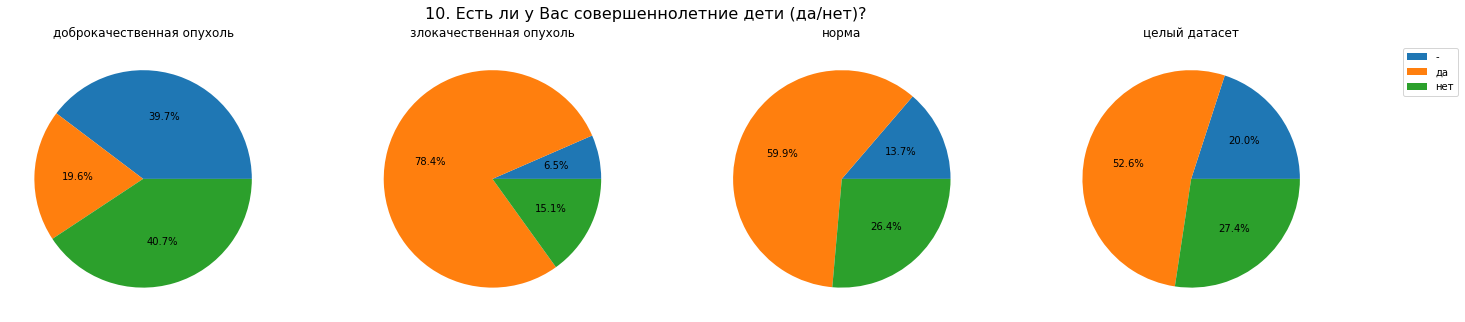

In [10]:
viz.plot_pies(df, defs.QUESTION_10, defs.LABEL)

### 11. Если да, как часто вы общаетесь?

In [11]:
num = df.loc[df[defs.QUESTION_10] == defs.YES, defs.QUESTION_11].isnull().sum()
print(f'Имеют в Признаке 10 "да", но НЕ ИМЕЮТ значения в Признаке 11 - {num} шт.')
num = df.loc[df[defs.QUESTION_10] == defs.NO, defs.QUESTION_11].notnull().sum()
print(f'Имеют в Признаке 10 "нет", но ИМЕЮТ значения в Признаке 11 - {num} шт.')

Имеют в Признаке 10 "да", но НЕ ИМЕЮТ значения в Признаке 11 - 0 шт.
Имеют в Признаке 10 "нет", но ИМЕЮТ значения в Признаке 11 - 22 шт.


In [12]:
index = df[(df[defs.QUESTION_10] == defs.NO) & (df[defs.QUESTION_11].notnull())].index
index = index.intersection(drop_df.index)
drop_df = drop_df.drop(index=index)

### 20. Каков уровень образования Вашего партнёра? (если применимо)

In [13]:
num = df.loc[df[defs.QUESTION_3].isin([defs.ANSWER_3_1, defs.ANSWER_3_2]), defs.QUESTION_20].isnull().sum()
print(f'Имеют в Признаке 3 "замужем"/"имею гражданского супруга", но НЕ ИМЕЮТ значения в Признаке 20 - {num} шт.')
num = df.loc[df[defs.QUESTION_3].isin([defs.ANSWER_3_3, defs.ANSWER_3_4, defs.ANSWER_3_5]), defs.QUESTION_20].notnull().sum()
print(f'Имеют в Признаке 3 "одинока"/"разведена"/"вдова", но ИМЕЮТ значения в Признаке 20 - {num} шт.')

Имеют в Признаке 3 "замужем"/"имею гражданского супруга", но НЕ ИМЕЮТ значения в Признаке 20 - 12 шт.
Имеют в Признаке 3 "одинока"/"разведена"/"вдова", но ИМЕЮТ значения в Признаке 20 - 43 шт.


In [14]:
index = df[(df[defs.QUESTION_3].isin([defs.ANSWER_3_1, defs.ANSWER_3_2])) & (df[defs.QUESTION_20].isnull())].index
index = index.intersection(drop_df.index)
drop_df = drop_df.drop(index=index)
index = df[(df[defs.QUESTION_3].isin([defs.ANSWER_3_3, defs.ANSWER_3_4, defs.ANSWER_3_5])) & (df[defs.QUESTION_20].notnull())].index
index = index.intersection(drop_df.index)
drop_df = drop_df.drop(index=index)

### 24. Если Вы живёте в многоквартирном доме, то на каком этаже?

In [15]:
num = df.loc[df[defs.QUESTION_23] == defs.ANSWER_23_1, defs.QUESTION_24].isnull().sum()
print(f'Имеют в Признаке 23 "многоквартирный дом", но НЕ ИМЕЮТ значения в Признаке 24 - {num} шт.')
num = df.loc[(df[defs.QUESTION_23].isin([defs.ANSWER_23_2, defs.ANSWER_23_3])), defs.QUESTION_24].notnull().sum()
print(f'Имеют в Признаке 23 "таунхаус"/"собственный дом", но ИМЕЮТ значения в Признаке 24 - {num} шт.')

Имеют в Признаке 23 "многоквартирный дом", но НЕ ИМЕЮТ значения в Признаке 24 - 1 шт.
Имеют в Признаке 23 "таунхаус"/"собственный дом", но ИМЕЮТ значения в Признаке 24 - 10 шт.


In [16]:
index = df[(df[defs.QUESTION_23] == defs.ANSWER_23_1) & (df[defs.QUESTION_24].isnull())].index
index = index.intersection(drop_df.index)
drop_df = drop_df.drop(index=index)
index = df[(df[defs.QUESTION_23].isin([defs.ANSWER_23_2, defs.ANSWER_23_3])) & (df[defs.QUESTION_24].notnull())].index
index = index.intersection(drop_df.index)
drop_df = drop_df.drop(index=index)

### 26. Сколько времени занимает Ваш путь до работы в одну сторону?

In [17]:
num = df.loc[df[defs.QUESTION_27].isin([defs.ANSWER_27_1, defs.ANSWER_27_2]), defs.QUESTION_26].isnull().sum()
print(f'Имеют в Признаке 27 "полный рабочий день"/"частичная занятость", но НЕ ИМЕЮТ значения в Признаке 26 - {num} шт.')
num = df.loc[df[defs.QUESTION_27].isin([defs.ANSWER_27_3, defs.ANSWER_27_4]), defs.QUESTION_26].notnull().sum()
print(f'Имеют в Признаке 27 "я работаю из дома"/"я не работаю", но ИМЕЮТ значения в Признаке 26 - {num} шт.')

Имеют в Признаке 27 "полный рабочий день"/"частичная занятость", но НЕ ИМЕЮТ значения в Признаке 26 - 1 шт.
Имеют в Признаке 27 "я работаю из дома"/"я не работаю", но ИМЕЮТ значения в Признаке 26 - 16 шт.


In [18]:
index = df[(df[defs.QUESTION_27].isin([defs.ANSWER_27_1, defs.ANSWER_27_2])) & (df[defs.QUESTION_26].isnull())].index
index = index.intersection(drop_df.index)
drop_df = drop_df.drop(index=index)
index = df[(df[defs.QUESTION_27].isin([defs.ANSWER_27_3, defs.ANSWER_27_4])) & (df[defs.QUESTION_26].notnull())].index
index = index.intersection(drop_df.index)
drop_df = drop_df.drop(index=index)

In [19]:
new_num = drop_df.shape[0]

In [20]:
print(f'Количество точек, включая протеворечивые - {old_num}.')
print(f'Количество точек без протеворечивых - {new_num}.')
print(f'В случае их исключения теряем {old_num - new_num} точек ({(old_num - new_num)/ old_num:.2%}).')

Количество точек, включая протеворечивые - 595.
Количество точек без протеворечивых - 468.
В случае их исключения теряем 127 точек (21.34%).
